In [1]:
# if openpiv is installed already using the instructions on Github, then it's not necessary here
!pip install -e git+https://github.com/openpiv/openpiv-python#egg=OpenPIV --upgrade

Obtaining OpenPIV from git+https://github.com/openpiv/openpiv-python#egg=OpenPIV
  Updating ./src/openpiv clone
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Attempting uninstall: OpenPIV
    Found existing installation: OpenPIV 0.23.2
    Uninstalling OpenPIV-0.23.2:
      Successfully uninstalled OpenPIV-0.23.2
  Running setup.py develop for OpenPIV


In [2]:
# %load red_Cell.py
from openpiv import tools, pyprocess, scaling, filters, \
                    validation
import numpy as np
import matplotlib.pyplot as plt

import imageio
from pylab import *
%matplotlib inline

from skimage import img_as_uint

In [3]:
# check that images exist in the same folder:
!ls

B001_1.tif		pic1.bmp	   src	     Y4-S3_Camera000398_a.txt
B001_2.tif		pic2.bmp	   test.txt  Y4-S3_Camera000398_b.txt
content			Problemcode.ipynb  tmp.png
OpenPIVtutorials.ipynb	README.md	   tmp.txt


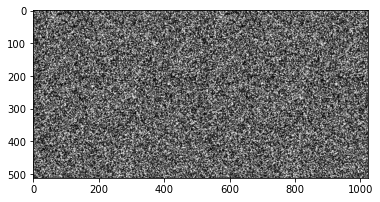

In [4]:
frame_a  = tools.imread('B001_1.tif')  
frame_b  = tools.imread('B001_2.tif')

plt.imshow(np.c_[frame_a,frame_b],cmap=plt.cm.gray)

In [5]:
# define parameters for the analysis:
winsize = 32
overlap = 8
searchsize = 64
scaling_factor = 1

In [6]:
u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), 
                                                     window_size=winsize, overlap=overlap,
                                                     dt=.1,
                                                     search_area_size=searchsize, 
                                                     sig2noise_method='peak2peak' )

x, y = pyprocess.get_coordinates( image_size=frame_a.shape, search_area_size=searchsize, overlap=overlap )

u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 1.1 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = scaling_factor )  #PYTHON VALUE ERROR
tools.save(x, y, u, v, sig2noise, mask, 'test.txt' )

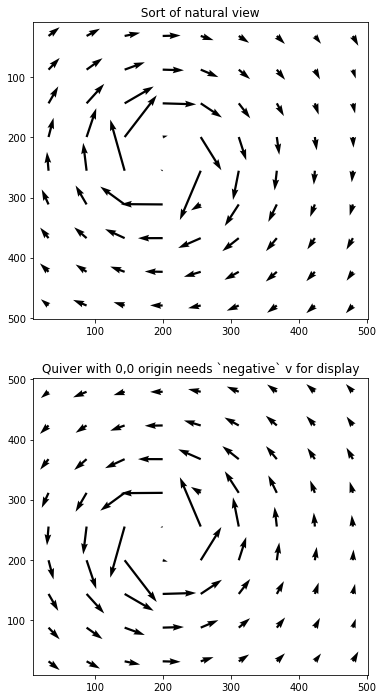

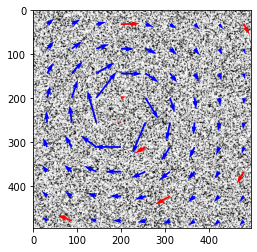

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [7]:
# "natural" view without image
fig,ax = plt.subplots(2,1,figsize=(6,12))
ax[0].invert_yaxis()
ax[0].quiver(x,y,u,v)
ax[0].set_title(' Sort of natural view ')

ax[1].quiver(x,y,u,-v)
ax[1].set_title('Quiver with 0,0 origin needs `negative` v for display');
# plt.quiver(x,y,u,v)



tools.display_vector_field('test.txt',on_img=True,image_name='B001_1.tif',
                           scaling_factor=scaling_factor,width=.008)